In [28]:
import pandas as pd
import numpy as np

In [29]:

df = pd.read_csv('includeState.csv', parse_dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

In [30]:
df = df.iloc[:,1:]

In [31]:
df['order_purchase_year'] = df['order_purchase_timestamp'].dt.year
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.month
df['order_purchase_day'] = df['order_purchase_timestamp'].dt.day
df['order_purchase_dayofweek'] = df['order_purchase_timestamp'].dt.dayofweek
df['order_purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df = df.drop(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date','order_delivered_customer_date'], axis = 1)
df


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,product_weight_g,...,customer_geolocation_lat,customer_geolocation_lng,order_delivered_customer_date_delay,customer_state,seller_state,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_dayofweek,order_purchase_hour
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,650.0,...,-21.762775,-41.309633,7.614421,RJ,SP,2017,9,13,2,8
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,30000.0,...,-20.220527,-50.903424,16.216181,SP,SP,2017,4,26,2,10
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,3050.0,...,-19.870305,-44.593326,7.948437,MG,MG,2018,1,14,6,14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,200.0,...,-23.089925,-46.611654,6.147269,SP,SP,2018,8,8,2,10
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,3750.0,...,-23.243402,-46.827614,25.114352,SP,PR,2017,2,4,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106550,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,10150.0,...,-2.497993,-44.297761,17.374699,MA,SC,2018,4,23,0,13
106551,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,8950.0,...,-25.566904,-49.309115,9.420243,PR,SP,2018,7,14,5,10
106552,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,967.0,...,-23.597794,-46.643923,4.801690,SP,PR,2017,10,23,0,17
106553,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,100.0,...,-23.040252,-46.979782,1.956030,SP,SP,2017,8,14,0,23


In [32]:
from geopy import distance
df['distance'] = df.apply(lambda x: distance.distance((x['seller_geolocation_lat'], x['seller_geolocation_lng']),
                                                          (x['customer_geolocation_lat'], x['customer_geolocation_lng'])).km, axis=1)
df = df.drop(['seller_geolocation_lat', 'seller_geolocation_lng', 'customer_geolocation_lat', 'customer_geolocation_lng'], axis = 1)

In [33]:
columns2 = ['order_id', 'product_id','order_item_id',
            'seller_id','shipping_limit_date','customer_id','order_status','customer_zip_code_prefix','seller_zip_code_prefix']
df.drop(columns2,axis=1,inplace=True)

In [34]:
df['volume_cm']=  (df['product_length_cm']*df['product_height_cm']*df['product_width_cm'])

In [35]:
df.drop(['product_length_cm','product_height_cm','product_width_cm'],axis=1, inplace=True)

In [36]:
def toList(x):
    a = []
    a.append(x)
    return a

In [37]:
# df['product_category_name_english'].apply(lambda x :list(x))
df['product_category_name_english'].apply(toList)

0                    [cool_stuff]
1                      [pet_shop]
2               [furniture_decor]
3                     [perfumery]
4                  [garden_tools]
                   ...           
106550               [housewares]
106551    [computers_accessories]
106552           [sports_leisure]
106553    [computers_accessories]
106554           [bed_bath_table]
Name: product_category_name_english, Length: 106555, dtype: object

In [38]:
df['product_category_name_english']=df['product_category_name_english'].apply(toList)

In [39]:
def plusCustomer(x):
    return x+"_C"

def plusSeller(x):
    return x+"_S"


    

In [40]:
df['customer_state']= df['customer_state'].apply(plusCustomer)
df['seller_state']= df['seller_state'].apply(plusSeller)

In [41]:
df['customer_state']= df['customer_state'].apply(toList)
df['seller_state']= df['seller_state'].apply(toList)

In [42]:
df

,price,freight_value,product_weight_g,product_category_name_english,order_delivered_customer_date_delay,customer_state,seller_state,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_dayofweek,order_purchase_hour,distance,volume_cm
0,58.90,13.29,650.0,[cool_stuff],7.614421,[RJ_C],[SP_S],2017,9,13,2,8,301.858959,3528.0
1,239.90,19.93,30000.0,[pet_shop],16.216181,[SP_C],[SP_S],2017,4,26,2,10,585.131104,60000.0
2,199.00,17.87,3050.0,[furniture_decor],7.948437,[MG_C],[MG_S],2018,1,14,6,14,311.506212,14157.0
3,12.99,12.79,200.0,[perfumery],6.147269,[SP_C],[SP_S],2018,8,8,2,10,292.064162,2400.0
4,199.90,18.14,3750.0,[garden_tools],25.114352,[SP_C],[PR_S],2017,2,4,5,13,647.209811,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106550,299.99,43.41,10150.0,[housewares],17.374699,[MA_C],[SC_S],2018,4,23,0,13,2741.786140,53400.0
106551,350.00,36.53,8950.0,[computers_accessories],9.420243,[PR_C],[SP_S],2018,7,14,5,10,351.523090,44460.0
106552,99.90,16.95,967.0,[sports_leisure],4.801690,[SP_C],[PR_S],2017,10,23,0,17,338.924030,9576.0
106553,55.99,8.72,100.0,[computers_accessories],1.956030,[SP_C],[SP_S],2017,8,14,0,23,72.112500,8000.0


In [43]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df = pd.concat([df, pd.DataFrame(mlb.fit_transform(df['product_category_name_english']), columns = mlb.classes_, index = df.index)], axis = 1)
df

,price,freight_value,product_weight_g,product_category_name_english,order_delivered_customer_date_delay,customer_state,seller_state,order_purchase_year,order_purchase_month,order_purchase_day,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,58.90,13.29,650.0,[cool_stuff],7.614421,[RJ_C],[SP_S],2017,9,13,...,0,0,0,0,0,0,0,0,0,0
1,239.90,19.93,30000.0,[pet_shop],16.216181,[SP_C],[SP_S],2017,4,26,...,0,0,0,0,0,0,0,0,0,0
2,199.00,17.87,3050.0,[furniture_decor],7.948437,[MG_C],[MG_S],2018,1,14,...,0,0,0,0,0,0,0,0,0,0
3,12.99,12.79,200.0,[perfumery],6.147269,[SP_C],[SP_S],2018,8,8,...,0,0,0,0,0,0,0,0,0,0
4,199.90,18.14,3750.0,[garden_tools],25.114352,[SP_C],[PR_S],2017,2,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106550,299.99,43.41,10150.0,[housewares],17.374699,[MA_C],[SC_S],2018,4,23,...,0,0,0,0,0,0,0,0,0,0
106551,350.00,36.53,8950.0,[computers_accessories],9.420243,[PR_C],[SP_S],2018,7,14,...,0,0,0,0,0,0,0,0,0,0
106552,99.90,16.95,967.0,[sports_leisure],4.801690,[SP_C],[PR_S],2017,10,23,...,0,0,0,0,1,0,0,0,0,0
106553,55.99,8.72,100.0,[computers_accessories],1.956030,[SP_C],[SP_S],2017,8,14,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.columns

Index(['price', 'freight_value', 'product_weight_g',
       'product_category_name_english', 'order_delivered_customer_date_delay',
       'customer_state', 'seller_state', 'order_purchase_year',
       'order_purchase_month', 'order_purchase_day',
       'order_purchase_dayofweek', 'order_purchase_hour', 'distance',
       'volume_cm', 'agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers',
       'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden',
       'costruction_tools_tools', 'diapers_and_hygiene', 'drinks',
       'dvds_blu_ray', 'electronics', 'fashio_female_clothing',
       'fashion_bags_accessories', 'fashion_children

In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df = pd.concat([df, pd.DataFrame(mlb.fit_transform(df['customer_state']), columns = mlb.classes_, index = df.index)], axis = 1)
df

,price,freight_value,product_weight_g,product_category_name_english,order_delivered_customer_date_delay,customer_state,seller_state,order_purchase_year,order_purchase_month,order_purchase_day,...,PR_C,RJ_C,RN_C,RO_C,RR_C,RS_C,SC_C,SE_C,SP_C,TO_C
0,58.90,13.29,650.0,[cool_stuff],7.614421,[RJ_C],[SP_S],2017,9,13,...,0,1,0,0,0,0,0,0,0,0
1,239.90,19.93,30000.0,[pet_shop],16.216181,[SP_C],[SP_S],2017,4,26,...,0,0,0,0,0,0,0,0,1,0
2,199.00,17.87,3050.0,[furniture_decor],7.948437,[MG_C],[MG_S],2018,1,14,...,0,0,0,0,0,0,0,0,0,0
3,12.99,12.79,200.0,[perfumery],6.147269,[SP_C],[SP_S],2018,8,8,...,0,0,0,0,0,0,0,0,1,0
4,199.90,18.14,3750.0,[garden_tools],25.114352,[SP_C],[PR_S],2017,2,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106550,299.99,43.41,10150.0,[housewares],17.374699,[MA_C],[SC_S],2018,4,23,...,0,0,0,0,0,0,0,0,0,0
106551,350.00,36.53,8950.0,[computers_accessories],9.420243,[PR_C],[SP_S],2018,7,14,...,1,0,0,0,0,0,0,0,0,0
106552,99.90,16.95,967.0,[sports_leisure],4.801690,[SP_C],[PR_S],2017,10,23,...,0,0,0,0,0,0,0,0,1,0
106553,55.99,8.72,100.0,[computers_accessories],1.956030,[SP_C],[SP_S],2017,8,14,...,0,0,0,0,0,0,0,0,1,0


In [46]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df = pd.concat([df, pd.DataFrame(mlb.fit_transform(df['seller_state']), columns = mlb.classes_, index = df.index)], axis = 1)
df

,price,freight_value,product_weight_g,product_category_name_english,order_delivered_customer_date_delay,customer_state,seller_state,order_purchase_year,order_purchase_month,order_purchase_day,...,PE_S,PI_S,PR_S,RJ_S,RN_S,RO_S,RS_S,SC_S,SE_S,SP_S
0,58.90,13.29,650.0,[cool_stuff],7.614421,[RJ_C],[SP_S],2017,9,13,...,0,0,0,0,0,0,0,0,0,1
1,239.90,19.93,30000.0,[pet_shop],16.216181,[SP_C],[SP_S],2017,4,26,...,0,0,0,0,0,0,0,0,0,1
2,199.00,17.87,3050.0,[furniture_decor],7.948437,[MG_C],[MG_S],2018,1,14,...,0,0,0,0,0,0,0,0,0,0
3,12.99,12.79,200.0,[perfumery],6.147269,[SP_C],[SP_S],2018,8,8,...,0,0,0,0,0,0,0,0,0,1
4,199.90,18.14,3750.0,[garden_tools],25.114352,[SP_C],[PR_S],2017,2,4,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106550,299.99,43.41,10150.0,[housewares],17.374699,[MA_C],[SC_S],2018,4,23,...,0,0,0,0,0,0,0,1,0,0
106551,350.00,36.53,8950.0,[computers_accessories],9.420243,[PR_C],[SP_S],2018,7,14,...,0,0,0,0,0,0,0,0,0,1
106552,99.90,16.95,967.0,[sports_leisure],4.801690,[SP_C],[PR_S],2017,10,23,...,0,0,1,0,0,0,0,0,0,0
106553,55.99,8.72,100.0,[computers_accessories],1.956030,[SP_C],[SP_S],2017,8,14,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df.drop('product_category_name_english',axis=1,inplace=True)
df.drop('customer_state',axis=1,inplace=True)
df.drop('seller_state',axis=1,inplace=True)

In [48]:
df

,price,freight_value,product_weight_g,order_delivered_customer_date_delay,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_dayofweek,order_purchase_hour,distance,...,PE_S,PI_S,PR_S,RJ_S,RN_S,RO_S,RS_S,SC_S,SE_S,SP_S
0,58.90,13.29,650.0,7.614421,2017,9,13,2,8,301.858959,...,0,0,0,0,0,0,0,0,0,1
1,239.90,19.93,30000.0,16.216181,2017,4,26,2,10,585.131104,...,0,0,0,0,0,0,0,0,0,1
2,199.00,17.87,3050.0,7.948437,2018,1,14,6,14,311.506212,...,0,0,0,0,0,0,0,0,0,0
3,12.99,12.79,200.0,6.147269,2018,8,8,2,10,292.064162,...,0,0,0,0,0,0,0,0,0,1
4,199.90,18.14,3750.0,25.114352,2017,2,4,5,13,647.209811,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106550,299.99,43.41,10150.0,17.374699,2018,4,23,0,13,2741.786140,...,0,0,0,0,0,0,0,1,0,0
106551,350.00,36.53,8950.0,9.420243,2018,7,14,5,10,351.523090,...,0,0,0,0,0,0,0,0,0,1
106552,99.90,16.95,967.0,4.801690,2017,10,23,0,17,338.924030,...,0,0,1,0,0,0,0,0,0,0
106553,55.99,8.72,100.0,1.956030,2017,8,14,0,23,72.112500,...,0,0,0,0,0,0,0,0,0,1


In [49]:
numerical_columns = [ 'price', 'freight_value', 'product_weight_g', 'distance',
                     'volume_cm']

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

df_no =df.drop(['order_delivered_customer_date_delay'], axis = 1)
df_no['order_purchase_month_sin'] = np.sin(df_no['order_purchase_month'] / 12 * 2 * np.pi)
df_no['order_purchase_month_cos'] = np.cos(df_no['order_purchase_month'] / 12 * 2 * np.pi)
df_no['order_purchase_day_sin'] = np.sin(df_no['order_purchase_day'] / 31 * 2 * np.pi)
df_no['order_purchase_day_cos'] = np.cos(df_no['order_purchase_day'] / 31 * 2 * np.pi)
df_no['order_purchase_dayofweek_sin'] = np.sin(df_no['order_purchase_dayofweek'] / 7 * 2 * np.pi)
df_no['order_purchase_dayofweek_cos'] = np.cos(df_no['order_purchase_dayofweek'] / 7 * 2 * np.pi)
df_no['order_purchase_hour_sin'] = np.sin(df_no['order_purchase_hour'] / 24 * 2 * np.pi)
df_no['order_purchase_hour_cos'] = np.cos(df_no['order_purchase_hour'] / 24 * 2 * np.pi)
df_no 

,price,freight_value,product_weight_g,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_dayofweek,order_purchase_hour,distance,volume_cm,...,SE_S,SP_S,order_purchase_month_sin,order_purchase_month_cos,order_purchase_day_sin,order_purchase_day_cos,order_purchase_dayofweek_sin,order_purchase_dayofweek_cos,order_purchase_hour_sin,order_purchase_hour_cos
0,58.90,13.29,650.0,2017,9,13,2,8,301.858959,3528.0,...,0,1,-1.000000e+00,-1.836970e-16,0.485302,-0.874347,0.974928,-0.222521,0.866025,-0.500000
1,239.90,19.93,30000.0,2017,4,26,2,10,585.131104,60000.0,...,0,1,8.660254e-01,-5.000000e-01,-0.848644,0.528964,0.974928,-0.222521,0.500000,-0.866025
2,199.00,17.87,3050.0,2018,1,14,6,14,311.506212,14157.0,...,0,0,5.000000e-01,8.660254e-01,0.299363,-0.954139,-0.781831,0.623490,-0.500000,-0.866025
3,12.99,12.79,200.0,2018,8,8,2,10,292.064162,2400.0,...,0,1,-8.660254e-01,-5.000000e-01,0.998717,-0.050649,0.974928,-0.222521,0.500000,-0.866025
4,199.90,18.14,3750.0,2017,2,4,5,13,647.209811,42000.0,...,0,0,8.660254e-01,5.000000e-01,0.724793,0.688967,-0.974928,-0.222521,-0.258819,-0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106550,299.99,43.41,10150.0,2018,4,23,0,13,2741.786140,53400.0,...,0,0,8.660254e-01,-5.000000e-01,-0.998717,-0.050649,0.000000,1.000000,-0.258819,-0.965926
106551,350.00,36.53,8950.0,2018,7,14,5,10,351.523090,44460.0,...,0,1,-5.000000e-01,-8.660254e-01,0.299363,-0.954139,-0.974928,-0.222521,0.500000,-0.866025
106552,99.90,16.95,967.0,2017,10,23,0,17,338.924030,9576.0,...,0,0,-8.660254e-01,5.000000e-01,-0.998717,-0.050649,0.000000,1.000000,-0.965926,-0.258819
106553,55.99,8.72,100.0,2017,8,14,0,23,72.112500,8000.0,...,0,1,-8.660254e-01,-5.000000e-01,0.299363,-0.954139,0.000000,1.000000,-0.258819,0.965926


In [50]:
columns3 = ['order_purchase_year', 'order_purchase_month', 'order_purchase_day',
       'order_purchase_dayofweek', 'order_purchase_hour']
df_no.drop(columns3,axis=1,inplace=True)

In [51]:
df

,price,freight_value,product_weight_g,order_delivered_customer_date_delay,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_dayofweek,order_purchase_hour,distance,...,PE_S,PI_S,PR_S,RJ_S,RN_S,RO_S,RS_S,SC_S,SE_S,SP_S
0,58.90,13.29,650.0,7.614421,2017,9,13,2,8,301.858959,...,0,0,0,0,0,0,0,0,0,1
1,239.90,19.93,30000.0,16.216181,2017,4,26,2,10,585.131104,...,0,0,0,0,0,0,0,0,0,1
2,199.00,17.87,3050.0,7.948437,2018,1,14,6,14,311.506212,...,0,0,0,0,0,0,0,0,0,0
3,12.99,12.79,200.0,6.147269,2018,8,8,2,10,292.064162,...,0,0,0,0,0,0,0,0,0,1
4,199.90,18.14,3750.0,25.114352,2017,2,4,5,13,647.209811,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106550,299.99,43.41,10150.0,17.374699,2018,4,23,0,13,2741.786140,...,0,0,0,0,0,0,0,1,0,0
106551,350.00,36.53,8950.0,9.420243,2018,7,14,5,10,351.523090,...,0,0,0,0,0,0,0,0,0,1
106552,99.90,16.95,967.0,4.801690,2017,10,23,0,17,338.924030,...,0,0,1,0,0,0,0,0,0,0
106553,55.99,8.72,100.0,1.956030,2017,8,14,0,23,72.112500,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df_no

,price,freight_value,product_weight_g,distance,volume_cm,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,...,SE_S,SP_S,order_purchase_month_sin,order_purchase_month_cos,order_purchase_day_sin,order_purchase_day_cos,order_purchase_dayofweek_sin,order_purchase_dayofweek_cos,order_purchase_hour_sin,order_purchase_hour_cos
0,58.90,13.29,650.0,301.858959,3528.0,0,0,0,0,0,...,0,1,-1.000000e+00,-1.836970e-16,0.485302,-0.874347,0.974928,-0.222521,0.866025,-0.500000
1,239.90,19.93,30000.0,585.131104,60000.0,0,0,0,0,0,...,0,1,8.660254e-01,-5.000000e-01,-0.848644,0.528964,0.974928,-0.222521,0.500000,-0.866025
2,199.00,17.87,3050.0,311.506212,14157.0,0,0,0,0,0,...,0,0,5.000000e-01,8.660254e-01,0.299363,-0.954139,-0.781831,0.623490,-0.500000,-0.866025
3,12.99,12.79,200.0,292.064162,2400.0,0,0,0,0,0,...,0,1,-8.660254e-01,-5.000000e-01,0.998717,-0.050649,0.974928,-0.222521,0.500000,-0.866025
4,199.90,18.14,3750.0,647.209811,42000.0,0,0,0,0,0,...,0,0,8.660254e-01,5.000000e-01,0.724793,0.688967,-0.974928,-0.222521,-0.258819,-0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106550,299.99,43.41,10150.0,2741.786140,53400.0,0,0,0,0,0,...,0,0,8.660254e-01,-5.000000e-01,-0.998717,-0.050649,0.000000,1.000000,-0.258819,-0.965926
106551,350.00,36.53,8950.0,351.523090,44460.0,0,0,0,0,0,...,0,1,-5.000000e-01,-8.660254e-01,0.299363,-0.954139,-0.974928,-0.222521,0.500000,-0.866025
106552,99.90,16.95,967.0,338.924030,9576.0,0,0,0,0,0,...,0,0,-8.660254e-01,5.000000e-01,-0.998717,-0.050649,0.000000,1.000000,-0.965926,-0.258819
106553,55.99,8.72,100.0,72.112500,8000.0,0,0,0,0,0,...,0,1,-8.660254e-01,-5.000000e-01,0.299363,-0.954139,0.000000,1.000000,-0.258819,0.965926


In [53]:
train_data, test_data, train_labels, test_labels = train_test_split(df_no, df['order_delivered_customer_date_delay'], test_size = 0.2, random_state = 42)


In [54]:
train_data.shape

(85244, 134)

In [55]:
test_data.shape

(21311, 134)

In [56]:
pipeline = ColumnTransformer([
    ("Numerical", StandardScaler(), numerical_columns),
    ], remainder = 'passthrough',)

train_data = pipeline.fit_transform(train_data)
test_data = pipeline.transform(test_data)

In [57]:
import time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_pinball_loss

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [58]:
models = [['LinearRegression', LinearRegression()],
          ['BayesianRidge', BayesianRidge()],
          ['RandomForestRegressor',RandomForestRegressor(n_estimators=10)],
          ['Lasso',Lasso()],
          ['SGD', SGDRegressor()],
          ['LinearSVR', LinearSVR()],
          ['SupportVectorMachine', SVR(kernel='rbf', C=1000000, epsilon=0.001)],
          ['HistGradientBoosting', HistGradientBoostingRegressor()],
          ['GradientBoosting', GradientBoostingRegressor()],
          ['LGBM', LGBMRegressor()],
          ['XGB', XGBRegressor()],
          ['CatBoost', CatBoostRegressor(logging_level = 'Silent')],]

model_data = []
for name, curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_data, train_labels)
    end = time.time()
    train_pred = curr_model.predict(train_data)
    test_pred = curr_model.predict(test_data)
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_MAE"] = mean_absolute_error(train_labels, train_pred)
    curr_model_data["Test_MAE"] = mean_absolute_error(test_labels, test_pred)
    curr_model_data["Train_MSE"] = mean_squared_error(train_labels, train_pred)
    curr_model_data["Test_MSE"] = mean_squared_error(test_labels, test_pred)
    curr_model_data["Train_RMSE"] = np.sqrt(mean_squared_error(train_labels, train_pred))
    curr_model_data["Test_RMSE"] = np.sqrt(mean_squared_error(test_labels, test_pred))
    curr_model_data["Train_MAPE"] = mean_absolute_percentage_error(train_labels, train_pred)
    curr_model_data["Test_MAPE"] = mean_absolute_percentage_error(test_labels, test_pred)
    curr_model_data["Train_R2"] = r2_score(train_labels, train_pred)
    curr_model_data["Test_R2"] = r2_score(test_labels, test_pred)
    curr_model_data["Train_Quantile_Loss"] = mean_pinball_loss(train_labels, train_pred, alpha = 0.75)
    curr_model_data["Test_Quantile_Loss"] = mean_pinball_loss(test_labels, test_pred, alpha = 0.75)
    
    model_data.append(curr_model_data)

model_scores = pd.DataFrame(model_data)
model_scores

In [ ]:
model_scores.plot(x = 'Name', y = ['Train_RMSE', 'Test_RMSE'], kind = 'bar', figsize = (10, 8), rot = 45)

NameError: name 'model_scores' is not defined

In [245]:
from flaml import AutoML

automl = AutoML()
automl_settings = {
    'time_budget': 180,
    'task': 'regression',
    'estimator_list': ['lgbm'],
    'metric': 'rmse',
    'verbose': 0,
}

automl.fit(X_train = train_data, y_train = train_labels, **automl_settings)

print('Best hyperparmeter config:', automl.best_config)

Best hyperparmeter config: {'n_estimators': 629, 'num_leaves': 1404, 'min_child_samples': 3, 'learning_rate': 0.044271189929222285, 'log_max_bin': 10, 'colsample_bytree': 0.5510674622775554, 'reg_alpha': 0.001975258376030875, 'reg_lambda': 2.6366610240568944, 'FLAML_sample_size': 76719}


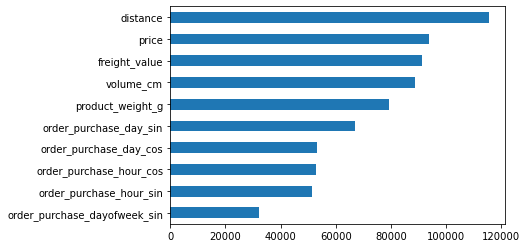

In [246]:
feat_importances = pd.Series(automl.model.estimator.feature_importances_, index = df_no.columns)
feat_importances.nlargest(10).plot(kind = 'barh').invert_yaxis()

array([[-4.17802238e-01, -7.70566356e-01, -4.90972193e-01, ...,
        -9.00968868e-01,  5.00000000e-01, -8.66025404e-01],
       [-6.02211438e-02, -4.01053400e-01,  3.73656345e-01, ...,
        -2.22520934e-01, -9.65925826e-01,  2.58819045e-01],
       [-1.79396785e-01, -4.17339048e-02, -4.79770960e-01, ...,
         6.23489802e-01, -1.00000000e+00, -1.83697020e-16],
       ...,
       [-3.85787328e-01,  2.80634295e-01, -1.59735721e-01, ...,
         6.23489802e-01,  1.22464680e-16, -1.00000000e+00],
       [-1.14933597e-01, -1.28378322e-01, -2.79748935e-01, ...,
        -2.22520934e-01, -5.00000000e-01, -8.66025404e-01],
       [ 1.13125244e-01, -2.69175500e-01,  1.33629915e-01, ...,
        -9.00968868e-01,  1.22464680e-16, -1.00000000e+00]])